# Restaurant Business Rankings 2020

<ol>
    <li> 
        <strong><a href="#1.">Importing Libraries and Loading Data</a></strong>
    </li>
    <li> 
        <strong><a href="#2.">Top 250 Restaurants</a></strong>
        <ul style="list-style: none;">
            <li>
                2.1 <a href="#2.1">Normalizing Data and Extracting Features</a>
                <ul style="list-style: none;">
                    <li>
                        2.1.1 <a href="#2.1.1">Standarizing Columns</a>
                    </li>
                </ul>
            </li>
            <li>
                2.2 <a href="#2.2">Exploratory Data Analysis</a>
                <ul style="list-style: none;">
                    <li>
                        2.2.1 <a href="#2.2.1">Analyzing Single Variables</a>
                        <ul style="list-style: none;">
                            <li>
                                2.2.1.1 <a href="#2.2.1.1">Category</a>
                            </li>
                            <li>
                                2.2.1.2 <a href="#2.2.1.2">Headquarters</a>
                            </li>
                            <li>
                                2.2.1.3 <a href="#2.2.1.3">Sales</a>
                                <ul style="list-style: none;">
                                    <li>
                                        2.2.1.3.1 <a href="#2.2.1.3.1">Year On Year Sales (%)</a>
                                    </li>
                                </ul>
                            </li>
                            <li>
                                2.2.1.4 <a href="#2.2.1.4">Units</a>
                                <ul style="list-style: none;">
                                    <li>
                                        2.2.1.4.1 <a href="#2.2.1.4.1">Year On Year Units (%)</a>
                                    </li>
                                </ul>
                            </li>
                            <li> <a href="#2.2.1_overview"> Variables Overview </a></li>
                        </ul>
                    </li>
                </ul>
            </li>
            <li>
                2.2.2 <a href="#2.2.2">Mixing Variables</a>
                <ul style="list-style: none;">
                    <li>
                        2.2.2.1 <a href="#2.2.2.1">Grouping by Category</a>
                        <ul style="list-style: none;">
                            <li>
                                2.2.2.1.1 <a href="#2.2.2.1.1">Sales</a>
                                <ul style="list-style: none;">
                                    <li>
                                        2.2.2.1.1.1 <a href="#2.2.2.1.1.1">Quick Service Industry</a>
                                    </li>
                                    <li>
                                        2.2.2.1.1.2 <a href="#2.2.2.1.1.2">Burger Sector</a>
                                    </li>
                                    <li>
                                        2.2.2.1.1.3 <a href="#2.2.2.1.1.3">Coffee Cafe Category</a>
                                    </li>
                                </ul>
                            </li>
                        </ul>
                    </li>
                </ul>
           </li>
        </ul>
    </li>
</ol>

<a id="1."></a>

# 1. Importing Libraries and Loading Data

In [1]:
# data handling and stats
import pandas as pd
import numpy as np
import scipy

# visualization
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns

# machine learning
from sklearn.preprocessing import LabelEncoder

In [2]:
# Uncomment cells to download the datasets

#!wget https://raw.githubusercontent.com/ftarantuviez/Restaurant-Business-Rankings-2020/master/datasets/Future50.csv -P datasets
#!wget https://raw.githubusercontent.com/ftarantuviez/Restaurant-Business-Rankings-2020/master/datasets/Independence100.csv -P datasets
#!wget https://raw.githubusercontent.com/ftarantuviez/Restaurant-Business-Rankings-2020/master/datasets/Top250.csv -P datasets

### Load datasets

In [3]:
df_top = pd.read_csv("datasets/Top250.csv")
df_ind = pd.read_csv("datasets/Independence100.csv")
df_fut = pd.read_csv("datasets/Future50.csv")

In [4]:
print("The shape of Top250 dataset is {}".format(df_top.shape))
print("The shape of Independence100 dataset is {}".format(df_ind.shape))
print("The shape of Future50 dataset is {}".format(df_fut.shape))

The shape of Top250 dataset is (250, 9)
The shape of Independence100 dataset is (100, 7)
The shape of Future50 dataset is (50, 9)


The number of observations are the expected, 250 for the 250 top restaurants, a hundred for the 100 best independece restaurants and just fifty for the future 50. However we see that the independence dataset has two column less than the other two datasets.

<a id="2."></a>

# 2. Top 250 restaurants

First we will start analyzing the dataset of the 250 top restaurants in the world. And to understand the data, below is a description of all the features in the dataset

- Rank: Ranking position
- Restaurant: Restaurant name
- Content: Description, only for certain restaurants
- Sales: in 2019 ($000000)
- YOY_sales: Year on year sales increase in %
- Units: Number of premises in US
- YOY_units: Year on year units increase in %
- Headquarters: Place of the restaurant's headquarters
- Segment_Category: Menu type and / or industry segment

In [5]:
df_top.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


<a id="2.1"></a>

## 2.1 Normalizing Data and Extracting Features

To facilitate the process of data analysis and data processing is a good approach follow some standards. Also, extracting some new features from the base one can be very useful for exploratory data analysis.

<a id="2.1.1"></a>

### 2.1.1 Standarizing Columns

First we are gonna make all the columns names as lowercase

In [6]:
columns_names = {
    "Rank": "rank",
    "Restaurant": "restaurant",
    "Content": "description",
    "Sales": "sales",
    "YOY_Sales": "YOY_sales",
    "Units": "units",
    "YOY_Units": "YOY_units",
    "Headquarters": "headquarters",
    "Segment_Category": "category"
}


df_top.rename(columns_names, axis=1, inplace=True)
df_top.head()

,rank,restaurant,description,sales,YOY_sales,units,YOY_units,headquarters,category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


Then we can see that the variables which represent a percentage are in other type than number. This is because they have the sign of percentage %, so are converted to a string. Which I gonna do is create a new features with the same value but without that sign, and in a numerical format.

In [7]:
df_top[["YOY_sales", "YOY_units"]].dtypes

YOY_sales    object
YOY_units    object
dtype: object

In [8]:
df_top["YOY_sales_%"] = df_top["YOY_sales"].apply(lambda x: float(x.split("%")[0]))
df_top["YOY_units_%"] = df_top["YOY_units"].apply(lambda x: float(x.split("%")[0]))

df_top.head()

,rank,restaurant,description,sales,YOY_sales,units,YOY_units,headquarters,category,YOY_sales_%,YOY_units_%
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger,4.9,-0.5
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe,8.6,3.0
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken,13.0,5.0
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican,9.0,2.7
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger,2.7,0.2


Now let's analyse the feature of "category"

In [9]:
df_top.category.value_counts()[:5], len(df_top.category.value_counts())

(Varied Menu               22
 Mexican                   14
 Quick Service & Burger    13
 Family Style              10
 Italian/Pizza             10
 Name: category, dtype: int64,
 48)

As we can see, there are a lot of different categories. Also we can notice that some possible values contains two categories differents (for example: "Quick Service & Seafood"). What we are gonna do is split this categories into two different one and then get the dummies of all the categories, turning the categorical variable into a lot of numerical features.

In [10]:
all_categories = []
def get_all_categories(df):
    for i, category in enumerate(df.category):
        categories = category.split("&")
        for category in categories:
            category = category.lower()
            category = category.strip()
            category = "_".join(category.split())

            if category in df.columns.values:
                df.at[i, category] = 1
            else: 
                df[category] = 0 
                df.at[i, category] = 1

In [11]:
get_all_categories(df_top)
df_top.head()

,rank,restaurant,description,sales,YOY_sales,units,YOY_units,headquarters,category,YOY_sales_%,...,steak,seafood,family_casual,asian,snack,beverage,fine_dining,bbq,healthy,ethnic
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger,4.9,...,0,0,0,0,0,0,0,0,0,0
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe,8.6,...,0,0,0,0,0,0,0,0,0,0
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken,13.0,...,0,0,0,0,0,0,0,0,0,0
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican,9.0,...,0,0,0,0,0,0,0,0,0,0
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger,2.7,...,0,0,0,0,0,0,0,0,0,0


There we see the dummies features for all the different categories and their combinations.
To check it and prove it that we are in the correct side, let's run a simple test

In [12]:
def check_categories(serie, cat_to_check):
    ans = 0
    for categories in serie:
        if cat_to_check in categories:
            ans += 1
    return ans

print("There are {} restaurants with Mexican food".format(check_categories(df_top.category, "Mexican")))
print("And in the dummies are also {} restaurants".format(df_top.mexican.sum()))

There are 19 restaurants with Mexican food
And in the dummies are also 19 restaurants


As we see, the logic appears to be in the correct place.

Now we will add a single feature with the code of each different categories. Notice that here we are not considering the single category for each restaurant, instead the combination (if any). To achieve it, we use LabelEncoder from scikit learn

In [13]:
df_top["category_code"] = LabelEncoder().fit_transform(df_top.category)
df_top.category_code.unique()

array([32, 34, 33, 37, 39, 38, 18, 21,  6, 10, 17, 36,  8, 15,  9,  7, 23,
       20, 35, 19,  5, 41, 46, 31, 45, 40, 30, 22, 24, 28, 47, 11, 27, 29,
       43, 25, 12,  2, 42,  3,  4,  0, 16,  1, 14, 44, 26, 13])

Finally, we gonna extract the state of the headquarters in each restaurants.

Points to consider: 
- most restaurants don't have headquarters in the dataset (are NaN values)
- the headquarters place are in the format of: City, State (e.g. Dallas, TX)

In [14]:
def get_states(x):
    if type(x) == str:
        x = x.split(",")[1]
        x = x.strip()
    
    return x

df_top["headquarters_state"] = df_top.headquarters.apply(get_states)
df_top[~df_top["headquarters_state"].isna()]["headquarters_state"].head()

65     ON
66     FL
77     TX
101    TX
102    TN
Name: headquarters_state, dtype: object

<a id="2.2"></a>

<a id="250rest_eda"></a>

## 2.2 Exploratory Data Analysis

With the data already normalized, starting exploring the same data is a good idea. This section will be based in data analysis and statistics techniques.

<a id="2.2.1"></a>

### 2.2.1 Analyzing Single Variables

First things first. To have a good idea of our data, first we analize the single variables that we already have.

We create some function that allow us to plot and summarize categorical data

In [15]:
def plot_proportions(x, y, title="", theme=None, what_to_show=[]):
    colors = sns.color_palette(theme)
    
    if what_to_show[0] and what_to_show[1]:
        grid_size = 2
    elif what_to_show[0] or what_to_show[1]:
        grid_size = 1
    else:
        grid_size = False
    
    if grid_size:
        fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))
        fig1.suptitle(title)

        if what_to_show[0]:
            # barchart
            ax1.bar(height=y, x=x, color=colors)
            ax1.plot(y, color="red", label="Difference of recurrence")
            ax1.set_xticks([])
            ax1.legend()

        if what_to_show[1]:
            # pie chart
            explode = [.05] + [0]*(len(y)-1)
            wedges, texts, autotexts = ax2.pie(x=y, autopct='%1.2f%%', textprops=dict(color="w"), explode=explode, colors=colors)
            ax2.legend(wedges, x,
              title="Category",
              loc="center left",
              bbox_to_anchor=(-.5, 0, 0.5, 1.3))
    
    if what_to_show[2]:
        # waffle chart
        fig2 = plt.figure(
            FigureClass=Waffle,
            rows=5, 
            columns=10,
            values=y,
            figsize=(10, 6),
            labels=list(x),
            legend={'loc': 'upper right', "bbox_to_anchor":(1, 0, 0.5, 1), "title": "Enrrollment type"},
            colors=sns.color_palette("flare_r", len(x))
        )

def create_subset_dataset(counts, col, n, name):
    subset = pd.DataFrame(counts[:n]).reset_index()
    subset_count = subset.iloc[:,1].rename("count")
    subset_val = subset.iloc[:,0].rename(col)
    subset = pd.DataFrame([subset_count, subset_val]).T
    subset["type"] = name
    
    return subset
    
def summary_categorical(df, 
                        col, 
                        n_to_plot=None, 
                        custom_title=None, 
                        show_text=True, 
                        n_text=5,
                        color=None,
                        charts=[True, True, False]
                       ):
    fifth_per = 0
    n_text = n_text if n_text <= 5 else 5
    def print_information(place, i, percentage):
        print(""" 
            the {} recurrent {} 
            is **{}** with a count of {} times.
            In the entire dataset, it represents a percentage of {} %
            """.format(place, var, x[i], y[i], percentage))
        
    counts = df[col].value_counts()
    x = counts.index.values
    y = counts
    var = " ".join(col.split("_"))
    title = "Most Recurrent {}".format(var)
    
    if n_to_plot != None:
        top = create_subset_dataset(counts, col, n_to_plot, "top")
        x = top[col]
        y = top["count"]
        title = "Top {} {}s (most recurrent)".format(n_to_plot, var)
    
    title = custom_title if custom_title else title
    plot_proportions(x,y,title, theme=color, what_to_show=charts)
    
    if show_text:
        for i, label in zip(range(n_text), ["first", "second", "third", "fourth", "fifth"]):
            percentage = np.round((counts / len(df[col]))[i] * 100,2)
            print_information(label, i, percentage)
            fifth_per += percentage
    
    if n_text > 0:
        print("The first most common {}, represents a {}% of the whole dataset".format(n_text, np.round(fifth_per,2)))
    print("")

Also functions to understand continous data:

In [16]:
def summary_continous(df, var, show_lines=True):
    serie = df[var]
    mean = np.round(serie.mean(), 2)
    median = np.round(serie.median(), 2)
    std = np.round(serie.std(), 2)
    var_formatted = " ".join(var.split("_"))
    
    fig, axes = plt.subplots(2,2, figsize=(15,8))
    plt.suptitle("{} -- distribution".format(var_formatted))
    fig.set_facecolor(color="#f2f2f2")
    
    # kdeplot
    kde_ax = axes[1][0]
    sns.kdeplot(df[var], fill=True, ax=kde_ax)
    if show_lines:
        kde_yticks = kde_ax.get_yticks()
        kde_yticks_half = kde_yticks[(len(kde_yticks) // 2)]
        kde_ax.vlines(x=mean, ymin=0, ymax=max(kde_yticks), color="red", label=r"$\mu$ = {}".format(mean))
        kde_ax.vlines(x=median, ymin=0, ymax=max(kde_yticks), color="blue", label=r"median = {}".format(median))
        kde_ax.hlines(y=kde_yticks_half, xmin=mean, xmax=mean+std, color="green")
        kde_ax.hlines(y=kde_yticks_half, xmin=mean, xmax=mean-std, color="green", label="σ = {}".format(std))
        kde_ax.legend()
    
    # violinplot
    vio_plot = axes[1][1]
    sns.violinplot(x=df[var], ax=vio_plot)
    
    # histplot
    hist_ax = axes[0][0]
    hist_ax.hist(df[var])
    hist_yticks = hist_ax.get_yticks()
    if show_lines:
        hist_ax.vlines(x=mean, ymin=0, ymax=max(hist_yticks), color="red", label=r"$\mu$ = {}".format(mean))
        hist_ax.legend()
    
    # boxplot
    box_ax = axes[0][1]
    sns.boxplot(x=df[var],ax=box_ax)
    
    print("""The variable **{}** :: 
            has a range of [{}, {}], 
            where the mean fall in {} 
            with a standard deviation of {}, 
            and the median is equal to {}""".format(var_formatted, min(serie), max(serie), mean, std, median))

Now let's analyse each variable in the dataset.

<a id="2.2.1.1"></a>

#### 2.2.1.1 Category

In [17]:
category_250 = df_top.category
category_250.head()

0         Quick Service & Burger
1    Quick Service & Coffee Cafe
2        Quick Service & Chicken
3        Quick Service & Mexican
4         Quick Service & Burger
Name: category, dtype: object

Watching the most common categories ...

In [18]:
category_250.value_counts().head(8)

Varied Menu               22
Mexican                   14
Quick Service & Burger    13
Family Style              10
Italian/Pizza             10
Burger                    10
Pizza                      9
Steak                      9
Name: category, dtype: int64

 
            the first recurrent category 
            is **Varied Menu** with a count of 22 times.
            In the entire dataset, it represents a percentage of 8.8 %
            
 
            the second recurrent category 
            is **Mexican** with a count of 14 times.
            In the entire dataset, it represents a percentage of 5.6 %
            
 
            the third recurrent category 
            is **Quick Service & Burger** with a count of 13 times.
            In the entire dataset, it represents a percentage of 5.2 %
            
 
            the fourth recurrent category 
            is **Family Style** with a count of 10 times.
            In the entire dataset, it represents a percentage of 4.0 %
            
 
            the fifth recurrent category 
            is **Italian/Pizza** with a count of 10 times.
            In the entire dataset, it represents a percentage of 4.0 %
            
The first most common 5, represents a 27.6% of the whole datase

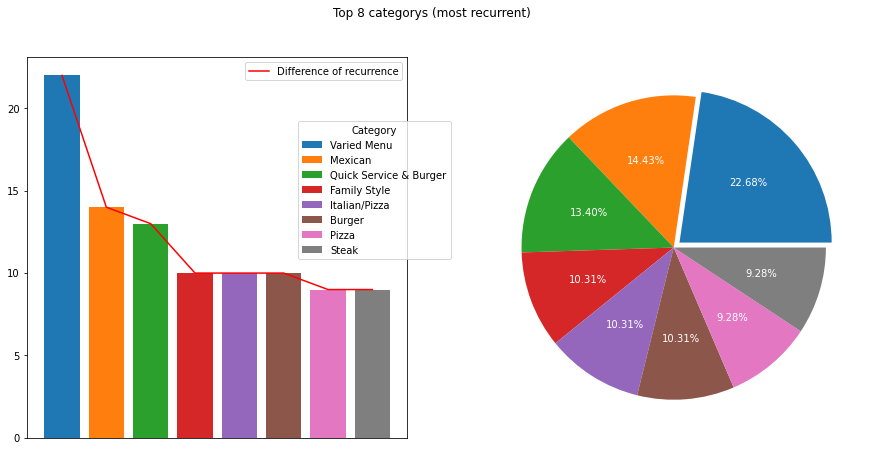

In [19]:
summary_categorical(df_top, "category", n_to_plot=8)

With the above information we can notice that the most common category in the top 250 restaurants is a Varied Menu, which means that does not have a specific thematic in the restaurant. It represent the 8.8% of the whole dataset (250 restaurants). Then also we can observe that Mexican food represents a 5.6% of the dataset. More generally, the fifth most common categories in the top 250 restaurants represents a 27.6% of the all restaurants.

<a id="2.2.1.2"> </a>

#### 2.2.1.2 Headquarters

In [20]:
headquarters_top = df_top.headquarters
headquarters_top.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: headquarters, dtype: object

[TO CONSIDER]: This variable has a lot of NaN values :p

In [21]:
headquarters_top.value_counts(dropna=False).head(8)

NaN            198
Dallas, TX       6
Houston, TX      3
Irving, TX       3
Austin, TX       2
Denver, CO       2
Plano, TX        2
Addison, TX      2
Name: headquarters, dtype: int64

 
            the first recurrent headquarters 
            is **Dallas, TX** with a count of 6 times.
            In the entire dataset, it represents a percentage of 2.4 %
            
 
            the second recurrent headquarters 
            is **Houston, TX** with a count of 3 times.
            In the entire dataset, it represents a percentage of 1.2 %
            
 
            the third recurrent headquarters 
            is **Irving, TX** with a count of 3 times.
            In the entire dataset, it represents a percentage of 1.2 %
            
 
            the fourth recurrent headquarters 
            is **Denver, CO** with a count of 2 times.
            In the entire dataset, it represents a percentage of 0.8 %
            
 
            the fifth recurrent headquarters 
            is **Addison, TX** with a count of 2 times.
            In the entire dataset, it represents a percentage of 0.8 %
            
The first most common 5, represents a 6.4% of the whole datas

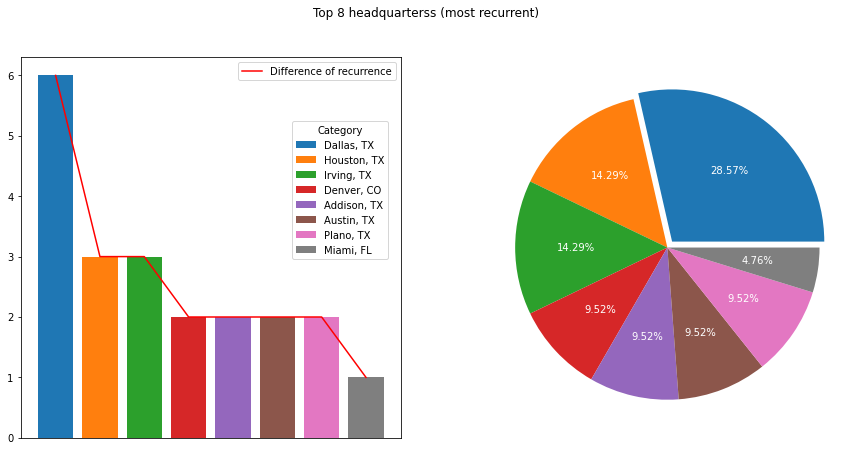

In [22]:
summary_categorical(df_top, "headquarters", n_to_plot=8)

As we can notice, most of the headquarters are in Dallas, Texas. However, this "most" are only 6 restaurants, and also represents just a 2.4% of the dataset. Why? Because, as previously said, there are a lot of NaN values.
Maybe a best approach is just analyze the state instead de city-state combination

<a id="2.2.1.3"></a>

#### 2.2.1.3 Sales

The variable **sales** :: 
            has a range of [126, 40412], 
            where the mean fall in 1242.74 
            with a standard deviation of 3365.23, 
            and the median is equal to 330.0


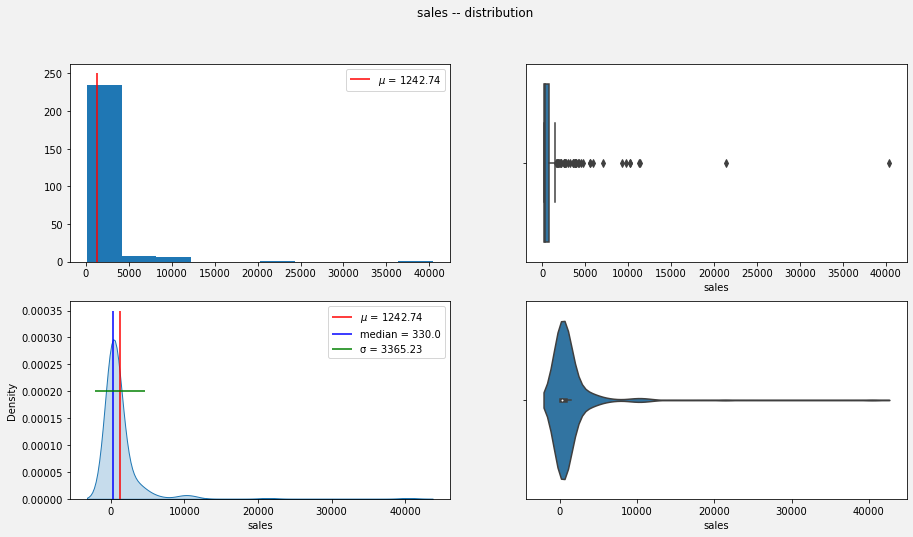

In [23]:
summary_continous(df_top, "sales")

[TO REMEMBER] The values are in millions dollars

The above charts tell us that the sales have a large range of values, starting almost from 0 (126 exactly) and going to ~40,000. It appears to be a normal distribution (bell shape) around 120 to 900, but with a huge right skew, meaning there are some restaurants that have had a lot of sales more than the majority of the others 250 restaurants. It is better seen in the boxplot, where we notice a big quanity of outliers.

Now we are gonna do a bin technique with the sales, to represent them as categorical variable and understand better it distribution. We are gonna make

 
            the first recurrent sales binned 
            is **(120, 500]** with a count of 160 times.
            In the entire dataset, it represents a percentage of 64.0 %
            
The first most common 1, represents a 64.0% of the whole dataset



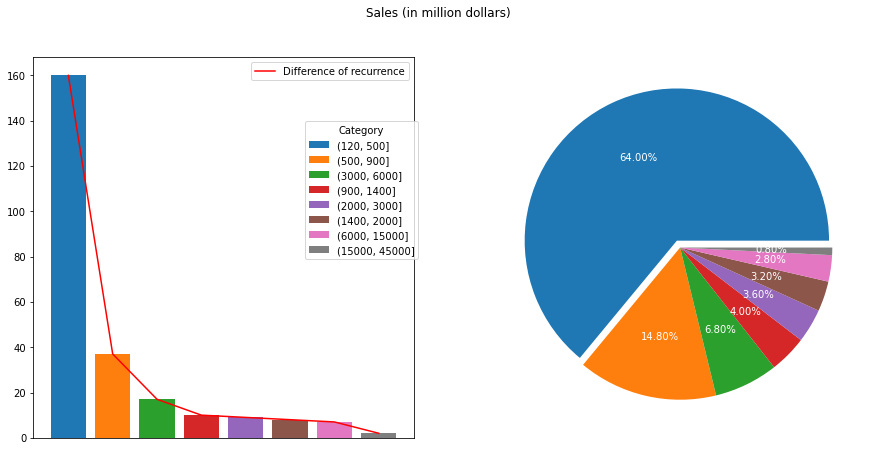

In [24]:
bins_sales = [120, 500, 900, 1400, 2000, 3000, 6000, 15000, 45000]
df_top["sales_binned"] = pd.cut(df_top.sales, bins=bins_sales).astype(str)
summary_categorical(df_top, "sales_binned", custom_title="Sales (in million dollars)", n_text=1)

There we can see that the most restaurants into the range of 120 to 500 (millions dollars), and a relativily big portion between 500 and 900 million dollars. And a really small proportion goes up to 10000.

In [25]:
logical_df_top_sales = df_top[df_top.sales > 10000]
for i, (rest, sales) in enumerate(zip(logical_df_top_sales.restaurant, logical_df_top_sales.sales)):
    print("The number {} restaurant in sales > 10000 is {} with {}000000$ sales in 2020".format(i, rest, sales))

The number 0 restaurant in sales > 10000 is McDonald's with 40412000000$ sales in 2020
The number 1 restaurant in sales > 10000 is Starbucks with 21380000000$ sales in 2020
The number 2 restaurant in sales > 10000 is Chick-fil-A with 11320000000$ sales in 2020
The number 3 restaurant in sales > 10000 is Taco Bell with 11293000000$ sales in 2020
The number 4 restaurant in sales > 10000 is Burger King with 10204000000$ sales in 2020
The number 5 restaurant in sales > 10000 is Subway with 10200000000$ sales in 2020


<a id="2.2.1.3.1"></a>

##### 2.2.1.3.1 Year On Year Sales (%)

The variable **YOY sales %** :: 
            has a range of [-21.2, 39.5], 
            where the mean fall in 2.94 
            with a standard deviation of 8.95, 
            and the median is equal to 2.2


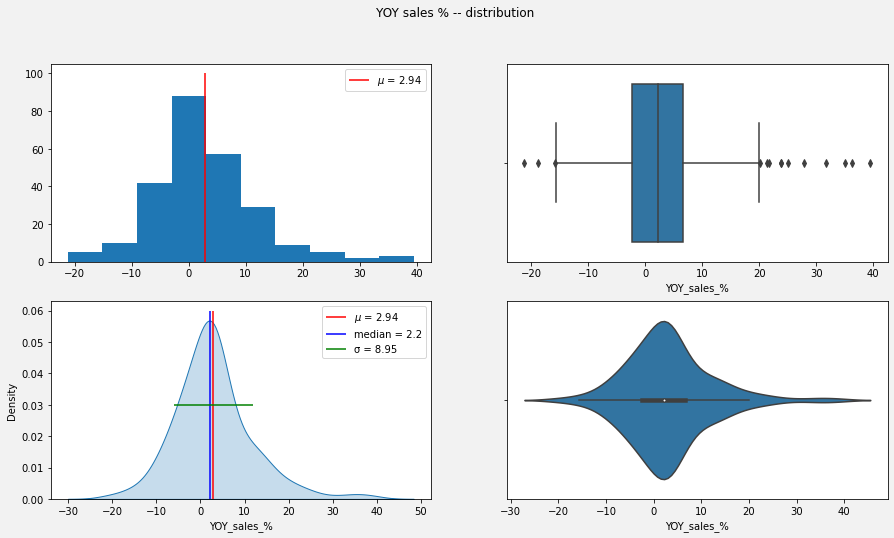

In [26]:
summary_continous(df_top, "YOY_sales_%")

In the Year on Year sales percentage, we can realize we have a bell shape depicting a normal distribution. However, there is a small right skew that can slightly affect the mean value. Most percentages of year on year sales fall between in the approximate range of (-9, 11), meaning that there are a significant number of restaurants with negative growth in matter of sales. Also there is another significant proportion which has not grown nothing (restaurants that are near to 0), some others has grown 5-10%, and a small percentage of the 250 restaurants has grown a lot (~40%)

For example, the restaurant which had the most agressive growth is shown below and his "Chicken Salad Chick"

In [27]:
max_growing = max(df_top["YOY_sales_%"])
df_top[df_top["YOY_sales_%"] == max_growing].reset_index(drop=True).loc[0, "restaurant"], max_growing

('Chicken Salad Chick', 39.5)

And the restaurant with the biggest decrease is "Houlihan's"

In [28]:
min_growing = min(df_top["YOY_sales_%"])
df_top[df_top["YOY_sales_%"] == min_growing].reset_index(drop=True).loc[0, "restaurant"], min_growing

("Houlihan's", -21.2)

 
            the first recurrent YOY sales binned 
            is **(0.0, 21.2]** with a count of 154 times.
            In the entire dataset, it represents a percentage of 61.6 %
            
 
            the second recurrent YOY sales binned 
            is **(-21.2, 0.0]** with a count of 85 times.
            In the entire dataset, it represents a percentage of 34.0 %
            
 
            the third recurrent YOY sales binned 
            is **(21.2, 39.5]** with a count of 10 times.
            In the entire dataset, it represents a percentage of 4.0 %
            
The first most common 3, represents a 99.6% of the whole dataset



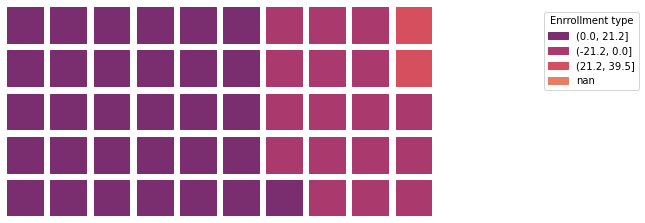

In [29]:
df_top["YOY_sales_binned"] = pd.cut(df_top["YOY_sales_%"], bins=[min_growing, 0, (min_growing * -1), max_growing]).astype(str)
summary_categorical(df_top, 
                    "YOY_sales_binned", 
                    n_text=3,
                    charts=[False, False, True]
                   )

154 restaurants had grown in 2020 around (0, 21]%, others 85 restaurants have decrease their sales between (0, 21]%, and only ten restaurants eateries have grown more than 21% 

<a id="2.2.1.4"></a>

#### 2.2.1.4 Units

The variable **units** :: 
            has a range of [13, 23801], 
            where the mean fall in 850.08 
            with a standard deviation of 2296.15, 
            and the median is equal to 207.0


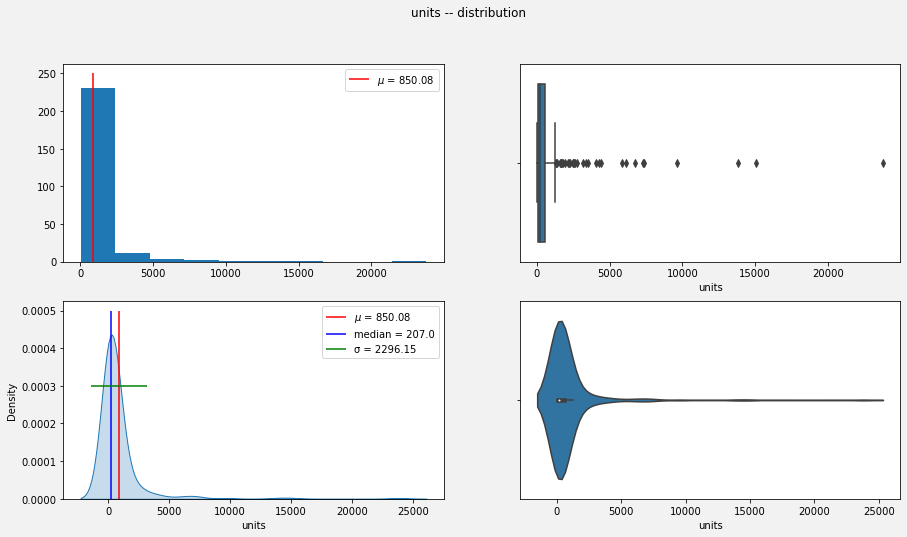

In [30]:
summary_continous(df_top, "units")

The distribution units (remember that units is the number of premises per restaurant in USA) is very similar to the sales (then we will explore this relation :p). What it changes is the range of values, it goes from thirteen (13) to twentythree thousands and eigth hundred (23800) units, but most restaurants have approximatly 90 to 400 differents premises, and there are some outliers that can have until 23000 units.

In [31]:
top_5_units = df_top.sort_values(by="units", ascending=False)[:5]
for i, (rest, units, rank) in enumerate(zip(top_5_units.restaurant, top_5_units.units, top_5_units["rank"])):
    print("The number {} restaurant in units is {} with {} units in 2020. (n°{})".format(i, rest, units, rank))

The number 0 restaurant in units is Subway with 23801 units in 2020. (n°6)
The number 1 restaurant in units is Starbucks with 15049 units in 2020. (n°2)
The number 2 restaurant in units is McDonald's with 13846 units in 2020. (n°1)
The number 3 restaurant in units is Dunkin' with 9630 units in 2020. (n°8)
The number 4 restaurant in units is Burger King with 7346 units in 2020. (n°5)


Now let's bin the units into 6 different bins

 
            the first recurrent units binned 
            is **(13.0, 400.0]** with a count of 164 times.
            In the entire dataset, it represents a percentage of 65.6 %
            
 
            the second recurrent units binned 
            is **(400.0, 800.0]** with a count of 38 times.
            In the entire dataset, it represents a percentage of 15.2 %
            
 
            the third recurrent units binned 
            is **(1200.0, 3000.0]** with a count of 20 times.
            In the entire dataset, it represents a percentage of 8.0 %
            
The first most common 3, represents a 88.8% of the whole dataset



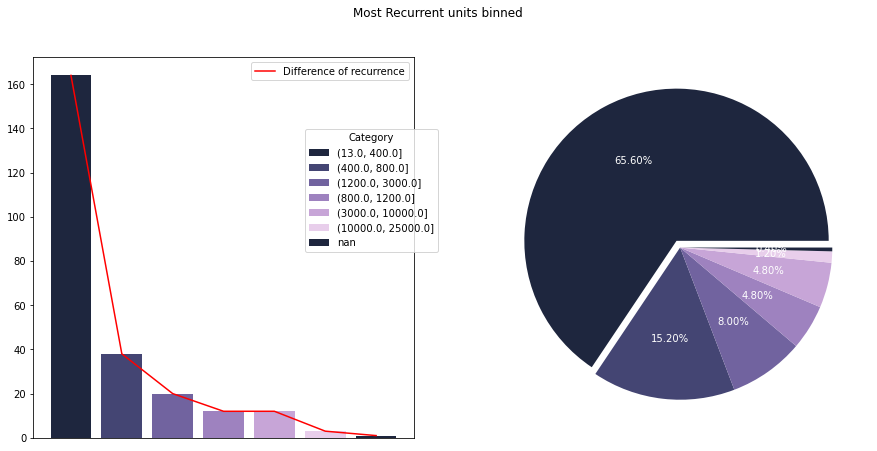

In [32]:
bins_units_top = [13, 400, 800, 1200, 3000, 10000, 25000]
df_top["units_binned"] = pd.cut(df_top["units"], bins=bins_units_top).astype(str)
summary_categorical(df_top, "units_binned", n_text=3, color=sns.color_palette("ch:s=-.25,rot=.25_r"))

<a id="2.2.1.4.1"></a>

##### 2.2.1.4.1 Year On Year Units (%)

The variable **YOY units %** :: 
            has a range of [-32.8, 38.5], 
            where the mean fall in 1.22 
            with a standard deviation of 7.94, 
            and the median is equal to 0.0


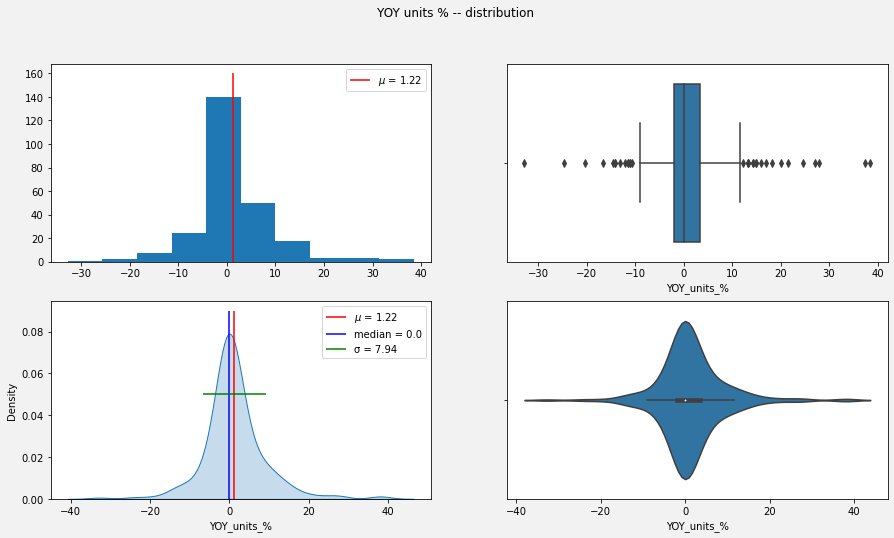

In [33]:
summary_continous(df_top, "YOY_units_%")

The distribution of the percentage growing in matter of units is a bell shape distribution, understanding it as a normal one. If we guide ourself considering the median instead of the mean (to avoid outliers), it value is exatly 0, and the standard deviation approximatly is 8. So the range where most of the values fall is [-8, 8], saying that the majority of the restaurants had increase or decrease premises in that range. Also there is a sort of left-right skew (yeah, both sides) where some restaurans had decrease or increas the number of units by ~40%.

A curious thing is that the restaurant with more growing in units is "Chicken Salad Chick", the same that we saw previously as the highest growing en sales.

In [34]:
max_growing_units = max(df_top["YOY_units_%"])
max_growing_units_rest = df_top[df_top["YOY_units_%"] == max_growing_units].reset_index(drop=True).loc[0, :]
print(
    "The restaurant {} is had the highest growing of units in 2020, with a percentage of {} and ranked in the {} position".format(max_growing_units_rest.restaurant, max_growing_units_rest.YOY_units, max_growing_units_rest["rank"]))

The restaurant Chicken Salad Chick is had the highest growing of units in 2020, with a percentage of 38.5% and ranked in the 215 position


And the same for the highest *decrease* in matter of units and sales, Houlihan's takes that position.

In [35]:
min_growing_units = min(df_top["YOY_units_%"])
min_growing_units_rest = df_top[df_top["YOY_units_%"] == min_growing_units].reset_index(drop=True).loc[0, :]
print(
    "The restaurant {} is had the highest growing of units in 2020, with a percentage of {} and ranked in the {} position".format(min_growing_units_rest.restaurant, min_growing_units_rest.YOY_units, min_growing_units_rest["rank"]))

The restaurant Houlihan's is had the highest growing of units in 2020, with a percentage of -32.8% and ranked in the 230 position


Let's see it binned:

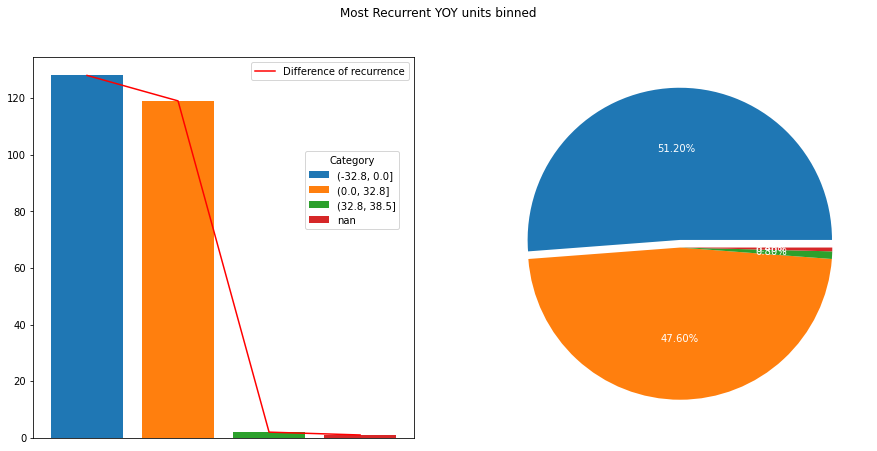

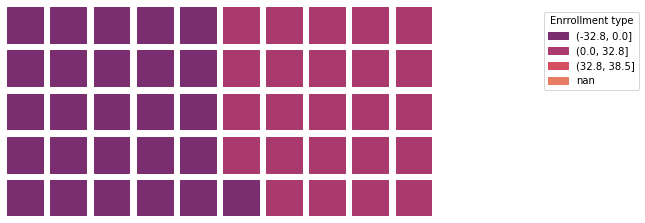

In [36]:
df_top["YOY_units_binned"] = pd.cut(df_top["YOY_units_%"], bins=[min_growing_units, 0, (min_growing_units * -1), max_growing_units]).astype(str)
summary_categorical(df_top, 
                    "YOY_units_binned", 
                    n_text=0,
                    charts=[True, True, True]
                   )

<a id="2.2.1_overview"></a>

### Variables Overview

As survey of the peviously seen variables, we can say that in the top 250 restaurants in 2020:

- The most recurrent category was **Varied Menu** representing 8.8% of the whole dataset, followed by **Mexican** food with a total percentage of 5.6%
- Mostly restaurants don't have headquarters in the dataset, but the ones that do have headquarters are mostly located in **Texas**
- The majority of restaurants had sales between **120 and 500 millions dollars**.
- Only six restaurants had sales with a number **greater than 10000 millions dollars**. They were McDonald's, Starbucks, Chick-fil-A, Taco Bell, Burguer King and Subway. These are also the first 6 rank positions.
- The restaurant with more sales in money was **McDonalds** (40.412 billions) followed by **Starbucks** (21.38 billions) and in the third place **Chick-fil-A** (11.32 billions)
- To notice in the last point, McDonalds (1st) has almost twice of the sales of Starbucks (2nd) and three times Chick-fil-A (third).
- The restaurants had a normal distribuited year on year sales (percentage of growth). Most companies had a percentage between (-9, 11), meaning that there are a significant proportion which decrease their sales.
- The most aggresive growth in matter of sales year on year was the restaurant **Chicken Salad Chick** (n°215), with a ~40%. And the highest decrease percentage was given by the restaurant **Houlihan's** with a value of -21.2%. (n°230).
- Talking about units, most restaurants have between 90 and 400 premises, however there are some ones that have more tan 20000
- **Subway** is the restaurant with more units with a total of 23801 (n°6), followed by **Starbucks** with 15049 (n°2) units and in the third place **McDonalds** with 13846 (n°1) units in totally.
- In year on year growing in units, it repeats the same pattern of **Chicken Salad Chick** and **Houlihan's** in year on year sales, but now the numbers are 38.5% and -32.8% respectively.

<a id="2.2.2"></a>

## 2.2.2 Mixing Variables 

We already know the variables for them self, now in this section we are gonna analyze them but not separately, instead grouping them and finding relationships.

<a id="2.2.2.1"></a>

### 2.2.2.1 Grouping by Category

First just we are going to reorder according only the category and sort them by descending sales

In [37]:
top_by_category = df_top.groupby("category").sum().sort_values(by="sales", ascending=False).loc[:, "sales":"YOY_units_%"]
top_by_category.head()

,sales,units,YOY_sales_%,YOY_units_%
category,,,,
Quick Service & Burger,79384,39172,28.2,2.0
Quick Service & Coffee Cafe,31889,25763,25.1,16.7
Quick Service & Chicken,22619,11271,34.3,3.6
Quick Service & Pizza,21316,24027,14.7,-3.7
Casual Dining & Varied Menu,15686,4967,-7.3,-3.3


<a id="2.2.2.1.1"></a>

#### 2.2.2.1.1 Sales

First we plot the sales by each category to understand which of them are the ones with more sales.

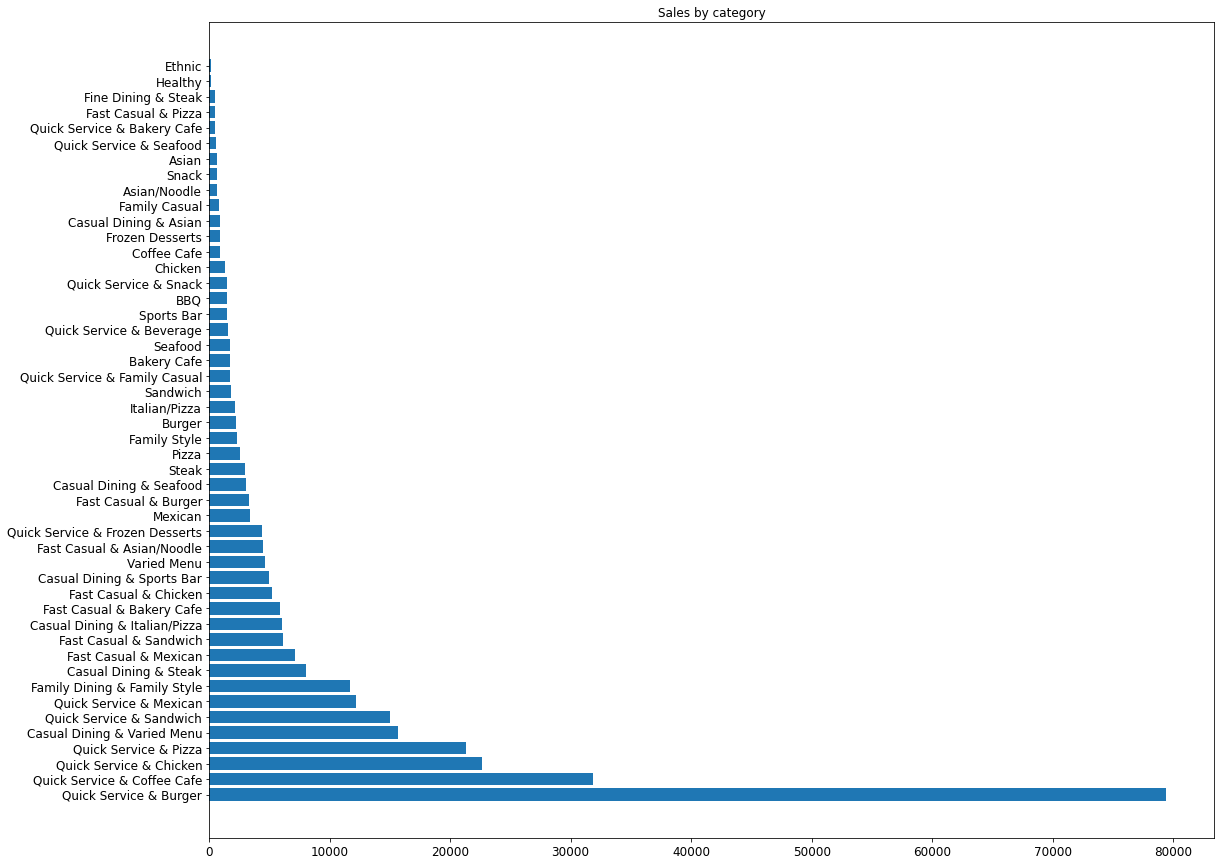

In [38]:
fig, ax = plt.subplots(1, figsize=(18,15))
ax.barh(y=top_by_category.index, width=top_by_category.sales)
plt.title("Sales by category")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

We can see that the burguer sector in the top 250 restaurants is the one with more sales with a huge difference o more twice time the second one (the coffe category). Let's inspect this category:

<a id="2.2.2.1.1.1"></a>

#### 2.2.2.1.1.1 Quick Service Industry

To understand the huge magnitude in the market of quick service, we are gonna plot the summatory of all the units and sales of this sector and compare it with the rest categories. See the below chart.

Number of restaurants with tag of 'Quick Service':: 47


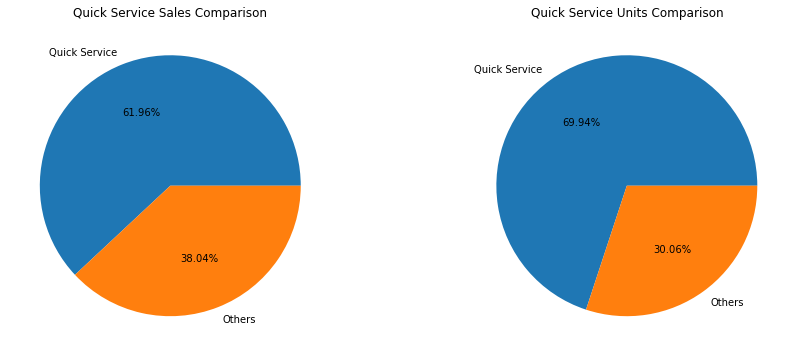

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

quick_service = df_top[df_top.quick_service == 1].reset_index(drop=True)
non_quick_service = df_top[df_top.quick_service == 0].reset_index(drop=True)

ax1.pie(x=[sum(quick_service.sales), sum(non_quick_service.sales)], labels=["Quick Service", "Others"], autopct="%.2f%%")
ax1.set_title("Quick Service Sales Comparison")
ax2.pie(x=[sum(quick_service.units), sum(non_quick_service.units)], labels=["Quick Service", "Others"], autopct="%.2f%%")
ax2.set_title("Quick Service Units Comparison")
print("Number of restaurants with tag of 'Quick Service':: {}".format(len(quick_service)))

There we know that the entire sector of quick service is (in sales) the approx. 62% of the sales in the top 250 restaurants and the approx 70% of units and considering that only 47 are restaurants of quick service.

<a id="2.2.2.1.1.2"></a>

#### 2.2.2.1.2 Burger Sector

In the first chart of this section, we saw that the burger industry is so big. So, let's extract interesting data from this industry:

There are 13 restaurants of the category 'Quick Service & Burger'
The best ranked restaurant in this category is McDonald's and is in the n°1 of the rank
The second best ranked restaurant in this category is Burger King and is in the n°5 of the rank
The 'worst' ranked restaurant in this category is Checkers Drive-In Restaurants and is in the n°85 of the rank
The sum of sales of all the categories less 'Quick Service & Burguer' is 231301
The sales of 'Quick Service & Burguer' category is 79384


Text(0.5, 1.0, 'Quick Service Burger Sales Distribution')

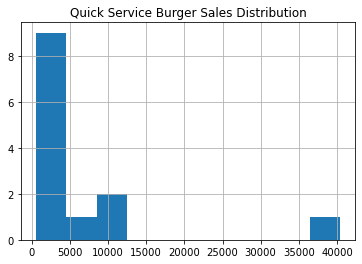

In [52]:
quick_service_burger = df_top[df_top.category == "Quick Service & Burger"].reset_index(drop=True)
print("There are {} restaurants of the category 'Quick Service & Burger'".format(len(quick_service_burger)))
print("The best ranked restaurant in this category is {} and is in the n°{} of the rank".format(quick_service_burger.loc[0, "restaurant"],quick_service_burger.loc[0, "rank"]))
print("The second best ranked restaurant in this category is {} and is in the n°{} of the rank".format(quick_service_burger.loc[1, "restaurant"],quick_service_burger.loc[1, "rank"]))
print("The 'worst' ranked restaurant in this category is {} and is in the n°{} of the rank".format(quick_service_burger.loc[len(quick_service_burger)-1, "restaurant"],quick_service_burger.loc[len(quick_service_burger)-1, "rank"]))
print("The sum of sales of all the categories less 'Quick Service & Burguer' is {}".format(df_top[df_top.category != "Quick Service & Burger"].sales.sum()))
print("The sales of 'Quick Service & Burguer' category is {}".format(quick_service_burger.sales.sum()))

quick_service_burger.sales.hist()
plt.title("Quick Service Burger Sales Distribution")

There are some points to notice here:

- Only 13 restaurants are in the category "Quick Service & Burguer". This means that only 5.2% of the 250 restaurants.
- The burguer sector represents the 25% of the all sales in the top 250 restaurants across all the differents categories.
- McDonald's constitute the 50% of the burguer category sales, which is also the 12.5% of all the restaurants sales.

If we see the growing of units year on year of the burger industry (histogram below), we can see that the majority has decrease a little bit the number of premises, although there is one restaurant which grew up 8%. However, the growing in sales is different, most restaurants have grown their sales year on year, and other which decrease 8% their sales.

Text(0.5, 1.0, 'YOY Sales & Units Distribution')

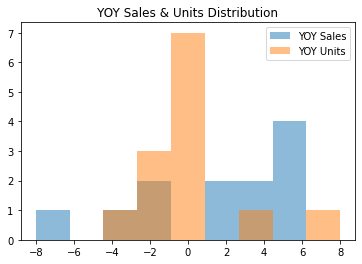

In [41]:
bins = np.linspace(-8, 8, 10)
plt.hist(quick_service_burger["YOY_sales_%"], bins, alpha=0.5, label='YOY Sales')
plt.hist(quick_service_burger["YOY_units_%"], bins, alpha=0.5, label='YOY Units')
plt.legend()
plt.title("YOY Sales & Units Distribution")

<a id="2.2.2.1.1.3"></a>

#### 2.2.2.1.3 Coffee Cafe Category

Other of the big categories is the coffee category, being the second one with more sales before the burger industry.

In [56]:
coffee_cat = df_top[df_top.category == "Quick Service & Coffee Cafe"].reset_index(drop=True)
coffee_cat

,rank,restaurant,description,sales,YOY_sales,units,YOY_units,headquarters,category,YOY_sales_%,...,fine_dining,bbq,healthy,ethnic,category_code,headquarters_state,sales_binned,YOY_sales_binned,units_binned,YOY_units_binned
0,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe,8.6,...,0,0,0,0,34,NaN,"(15000, 45000]","(0.0, 21.2]","(10000.0, 25000.0]","(0.0, 32.8]"
1,8,Dunkin',"Dunkin' dropped ""Donuts"" from its name and rep...",9228,5.0%,9630,2.2%,NaN,Quick Service & Coffee Cafe,5.0,...,0,0,0,0,34,NaN,"(6000, 15000]","(0.0, 21.2]","(3000.0, 10000.0]","(0.0, 32.8]"
2,66,Tim Hortons,On the other side of that equation is Tim Hort...,714,-3.5%,715,-1.7%,"Toronto, ON",Quick Service & Coffee Cafe,-3.5,...,0,0,0,0,34,ON,"(500, 900]","(-21.2, 0.0]","(400.0, 800.0]","(-32.8, 0.0]"
3,79,Dutch Bros. Coffee,NaN,567,15.0%,369,13.2%,NaN,Quick Service & Coffee Cafe,15.0,...,0,0,0,0,34,NaN,"(500, 900]","(0.0, 21.2]","(13.0, 400.0]","(0.0, 32.8]"


This is actually a interesting thing, the coffee category is the second category with most sales within the 250 restaurants, but they are only just 4 different restaurants, representing only the 1.6% of the entire dataset. Also, in these four restaurants, two are in the top 10 rank, which are Starbucks in the second position and Dunkin Donuts in the eigth one.

In [46]:
coffee_sales = coffee_cat.sales.sum()
coffee_sales

31889

In [48]:
total_sales = df_top.sales.sum()
percentage_coffee_sales = (coffee_sales * 100) // total_sales
print("The coffee category represents a {}% of the entire sales in the top 250 restaurants".format(percentage_coffee_sales))

The coffee category represents a 10% of the entire sales in the top 250 restaurants


Only 1.6% is part of the coffee industry accross all of the restaurants. However it percentage represents the 10% of the all sales in the dataset, which is impressive.

Text(0.0, 1.0, 'Sales by restaurants in Coffee Category')

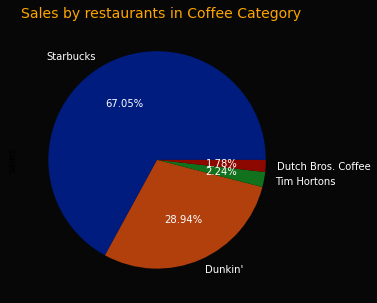

In [96]:
fig, ax = plt.subplots(1, figsize=(10,5))
coffee_cat.sales.plot(kind="pie", labels=coffee_cat.restaurant, autopct="%.2f%%", colors=sns.color_palette("dark"), textprops=dict(color="w"), ax=ax)
fig.set_facecolor("#070707")
plt.title("Sales by restaurants in Coffee Category", color="orange", loc="left", fontsize=14)

Starbucks is the 67% of the sales in the coffee category, that is the same to say that Starbucks is the 6.7% of the sales in the sum of all restaurants sales.

<a id="2.2.2.1.2"></a>

#### 2.2.2.1.2 Units

Now we plot the units by each category to understand which of them are the ones with more and less units.

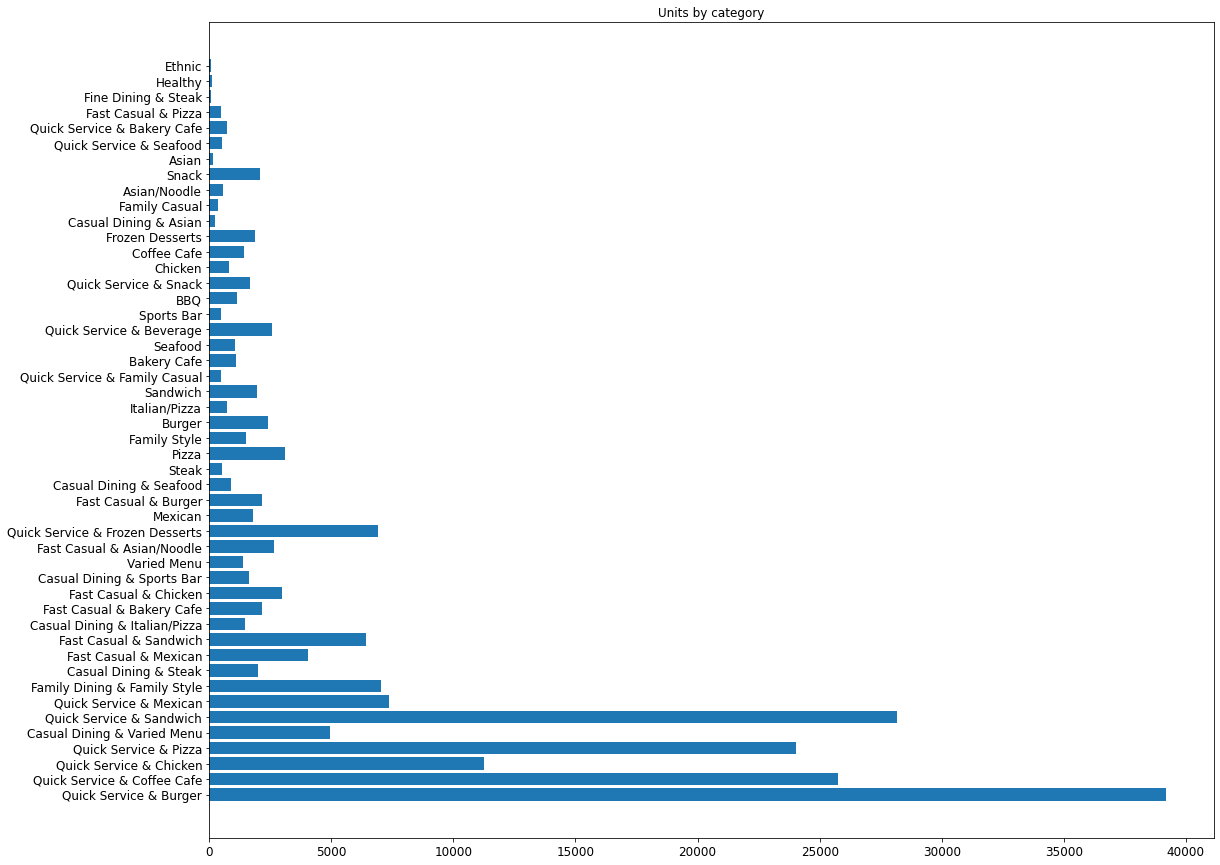

In [110]:
fig, ax = plt.subplots(1, figsize=(18,15))
ax.barh(y=top_by_category.index, width=top_by_category.units)
plt.title("Units by category")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)